<a href="https://colab.research.google.com/github/JayDown/3d-converter/blob/master/BlazePalm_ONNX_Inference_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [ ]:
%pip install onnxruntime
%pip install tflite2onnx

     |████████████████████████████████| 4.1MB 8.5MB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 92kB 4.6MB/s 
     |████████████████████████████████| 12.2MB 10.2MB/s 


In [ ]:
!wget https://github.com/google/mediapipe/raw/master/mediapipe/modules/palm_detection/palm_detection.tflite
!wget https://i.imgur.com/fYsTA9m.png
!wget https://i.imgur.com/NPlc2z8.png
!wget https://i.imgur.com/BfpQ0FF.png

--2021-04-23 06:51:13--  https://github.com/google/mediapipe/raw/master/mediapipe/modules/palm_detection/palm_detection.tflite
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/modules/palm_detection/palm_detection.tflite [following]
--2021-04-23 06:51:14--  https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/modules/palm_detection/palm_detection.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3877888 (3.7M) [application/octet-stream]
Saving to: ‘palm_detection.tflite.2’

palm_detection.tfli 100%[===================>]   3.70M  --.-KB/s    in

In [ ]:
!tflite2onnx palm_detection.tflite palm_detection.onnx

ONNX model path (palm_detection.onnx) existed!
Empty tensor used, please double confirm your code path!
Empty tensor used, please double confirm your code path!


### Inference

In [ ]:
import cv2
img = cv2.imread('fYsTA9m.png')
#img = cv2.imread('NPlc2z8.png')
#img = cv2.imread('BfpQ0FF.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
tensor = (img / 127.5 - 1.0).reshape((1, 128, 128, 3)).transpose(0, 3, 1, 2)

In [ ]:
import numpy as np
import onnxruntime as rt
sess = rt.InferenceSession('palm_detection.onnx')
pred = sess.run(None, {'input': tensor.astype(np.float32)})

### Visualization

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def draw_patch(regressor, classificator, stride, anchor_count, column, row, anchor, offset, color):
  index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

  score = sigmoid(regressor[index][0])
  if score < 0.5: return

  x, y, w, h = classificator[index][:4]

  x += (column + 0.5) * stride - w / 2
  y += (row    + 0.5) * stride - h / 2

  rect = patches.Rectangle((x, y), w, h, color = color, fill = None)
  ax.add_patch(rect)

  for key in range(7):
    x = classificator[index][4 + key * 2]
    y = classificator[index][5 + key * 2]
    
    x += (column + 0.5) * stride
    y += (row    + 0.5) * stride
    
    rect = patches.Rectangle((x, y), 1, 1, facecolor = color)
    ax.add_patch(rect)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


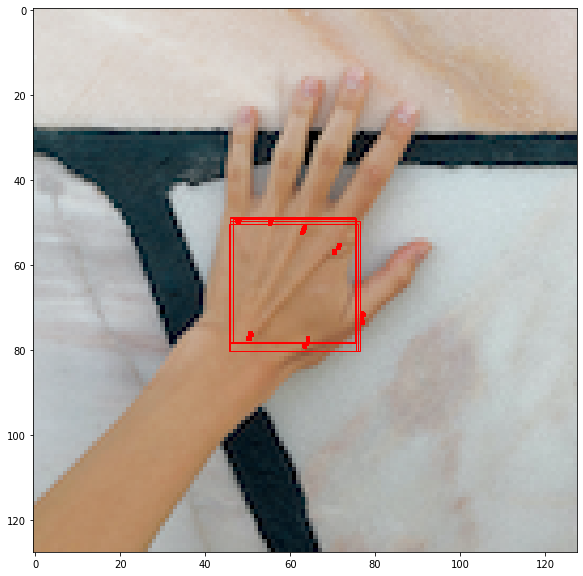

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img)

for y in range(16):
  for x in range(16):
    for a in range(2):
      draw_patch(pred[1][0], pred[0][0], 8, 2, x, y, a, 0, 'r')

for y in range(8):
  for x in range(8):
    for a in range(6):
      draw_patch(pred[1][0], pred[0][0], 16, 6, x, y, a, 512, 'b')

plt.show()